In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')
# mpl.rc('text', usetex=True)
mpl.rc('font', family='Arial')
mpl.rc('font',size = 6)
mpl.rc('mathtext',fontset = 'stix')
mpl.rc('xtick', labelsize=4)
mpl.rc('ytick', labelsize=4)
mpl.rc('axes', labelsize=4)
mpl.rc('axes', labelpad=1)
mpl.rc('axes', titlesize=6)
mpl.rc('axes', linewidth=0.2)
# mpl.rc('figure', figsize=(3.55/2.54, 7.5/2.54))
mpl.rc('figure', dpi=400)
mpl.rc('legend',frameon = False)
mpl.rc('savefig',pad_inches = 0.01)



cm_number = 40
cm = plt.cm.get_cmap("tab10")
colors = [
    ["#F9D5DD","#E3738B","#713948"],
    ["#DCE4FA","#8CA5EA","#495373"],
    ["#FFE8CE","#FCB462","#795B34"]
    
]
cm2 = plt.cm.get_cmap("Blues")
cm1 = plt.cm.get_cmap("Purples")
cm3 = plt.cm.get_cmap("Oranges")
Colors = [[cm1(1. / (cm_number - 1) * i) for i in range(0, cm_number)],[cm2(1. / (cm_number - 1) * i) for i in range(0, cm_number)],[cm3(1. / (cm_number - 1) * i) for i in range(0, cm_number)]]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [28]:
def CSS(x,t):
    dx = [x[1], -4.0941**2*x[0]--8.87878e-03*x[3], x[3], -4.0941**2*x[2]-8.89558e-03*x[1], x[5], -4.0941**2*x[4]]
    return dx

def ISS(x,t):
    dx = [x[1], -4.0481**2*x[0]--7.19687e-03*x[3], x[3], -4.0490**2*x[2]-7.19947e-03*x[1], x[5], -4.0490**2*x[4]]
    return dx

In [29]:
4.0941**2

16.76165481

In [30]:
CSStestdir = "./Data/CSS/testset/"
ISStestdir = './Data/ISS/testset/'
cases = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

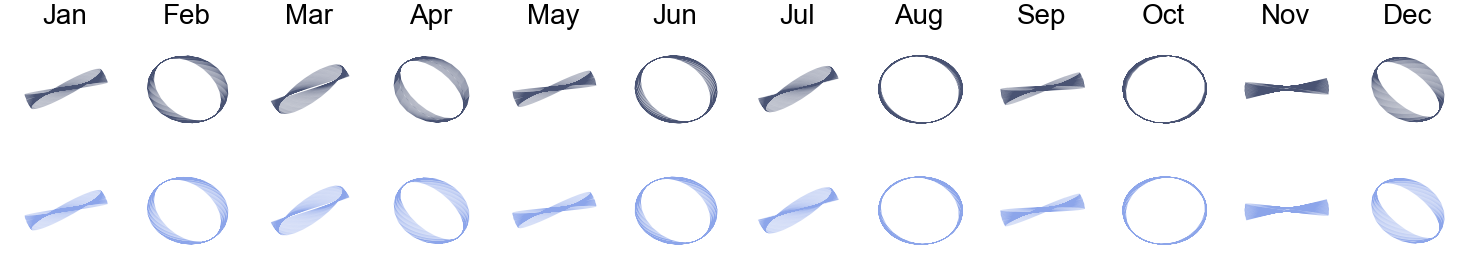

In [31]:
fig = plt.figure(figsize = (12/2.54,2/2.54))
plt.subplots_adjust(wspace = 0.3, hspace = 0.15)
for i in range(len(cases)):
    testcase = "%s%s.csv"%(CSStestdir,cases[i])
    testdata = pd.read_csv(testcase)
    t = np.linspace(0,len(testdata)/15,len(testdata))
    x0 = [testdata['x'][0], testdata['u'][0]*60*60,  testdata['y'][0], testdata['v'][0]*60*60, testdata['z'][0], testdata['w'][0]*60*60]
    predata = odeint(CSS, x0,t)
    idx_col = i*2//6
    idx_row = i*2%6
    ax = fig.add_subplot(2, 12, i+1, projection='3d')
    # ax = axes[idx_col,idx_row]
    # ax = plt.axes()
    ax.plot(testdata['x'],testdata['y'],testdata['z'], lw = 0.01, color = colors[1][2])
    ax.set_xlim(-6000,6000)
    ax.set_ylim(-6000,6000)
    ax.set_zlim(-6000,6000)
    ax.view_init(elev=30,    # 仰角
                 azim=20    # 方位角
                )
    # ax.grid(False) 
    ax.tick_params(axis='x', which='major', pad=-5)
    ax.tick_params(axis='y', which='major', pad=-7)
    ax.tick_params(axis='z', which='major', pad=-5)
    ax.set_xticks(ticks = [-4000,0,4000])
    ax.set_yticks(ticks = [-4000,0,4000])
    ax.set_zticks(ticks = [-4000,0,4000])
    ax.yaxis._axinfo["grid"].update({"linewidth":0.0})
    ax.xaxis._axinfo["grid"].update({"linewidth":0.0})
    ax.zaxis._axinfo["grid"].update({"linewidth":0.0})
    # ax.w_xaxis.set_pane_color((1,1,1,1))
    # ax.w_yaxis.set_pane_color((1,1,1,1))
    # ax.w_zaxis.set_pane_color((1,1,1,1))
    ax.axis('off')
    # ax.grid_params(linewidth = 0.1)
    ax.set_xlabel(r'$x_1\ (km)$', labelpad = -10)
    ax.set_ylabel(r'$x_2\ (km)$', labelpad = -15)
    ax.set_zlabel(r'$x_3\ (km)$', labelpad = -12)
    ax.set_title("%s"%cases[i], pad = 0,fontsize = 5)
    ax = fig.add_subplot(2, 12, i+12+1, projection='3d')
    ax.yaxis._axinfo["grid"].update({"linewidth":0.0})
    ax.xaxis._axinfo["grid"].update({"linewidth":0.0})
    ax.zaxis._axinfo["grid"].update({"linewidth":0.0})
    # ax = axes[idx_col,idx_row]
    # ax = plt.axes()
    ax.plot(predata[:,0],predata[:,2],predata[:,4], lw = 0.01, color = colors[1][1])
    ax.set_xlim(-6000,6000)
    ax.set_ylim(-6000,6000)
    ax.set_zlim(-6000,6000)
    ax.view_init(elev=30,    # 仰角
                 azim=20    # 方位角
                )
    # ax.grid(False) 
    ax.axis('off')
    ax.tick_params(axis='x', which='major', pad=-5)
    ax.tick_params(axis='y', which='major', pad=-7)
    ax.tick_params(axis='z', which='major', pad=-5)
    # ax.gird(None)
    # ax.w_xaxis.set_pane_color((1,1,1,1))
    # ax.w_yaxis.set_pane_color((1,1,1,1))
    # ax.w_zaxis.set_pane_color((1,1,1,1))
    ax.set_xticks(ticks = [-4000,0,4000])
    ax.set_yticks(ticks = [-4000,0,4000])
    ax.set_zticks(ticks = [-4000,0,4000])
    ax.yaxis._axinfo["grid"].update({"linewidth":0})
    ax.xaxis._axinfo["grid"].update({"linewidth":0})
    ax.zaxis._axinfo["grid"].update({"linewidth":0})
    # ax.grid_params(linewidth = 0.1)
    ax.set_xlabel(r'$x_1\ (km)$', labelpad = -10)
    ax.set_ylabel(r'$x_2\ (km)$', labelpad = -15)
    ax.set_zlabel(r'$x_3\ (km)$', labelpad = -12)
    # ax.set_title("%s(Inferred)"%cases[i], pad = 0,fontsize = 4)
plt.subplots_adjust(wspace = 0, hspace = 0)
plt.savefig('./Fig/CSS_test.svg',dpi = 1000,transparent = True,bbox_inches="tight",pad_inches=0.1)

2521
2521
2522
2522
2163
2572
2163
2883
2521
2521
2161
2162


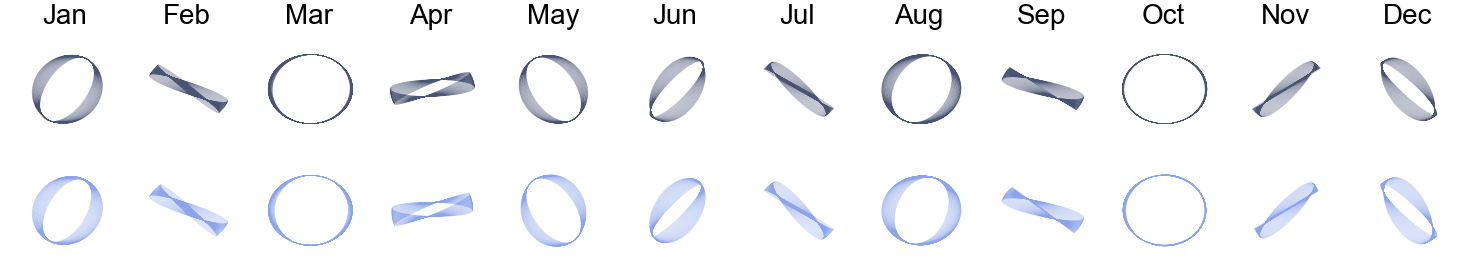

In [32]:
fig = plt.figure(figsize = (12/2.54,2/2.54))
plt.subplots_adjust(wspace = 0.3, hspace = 0.15)
for i in range(len(cases)):
    testcase = "%s%s.csv"%(ISStestdir,cases[i])
    testdata = pd.read_csv(testcase)
    t = np.linspace(0,len(testdata['x'])/15,len(testdata['x']))
    # print(len(t))
    x0 = [testdata['x'][0], testdata['u'][0]*60*60,  testdata['y'][0], testdata['v'][0]*60*60, testdata['z'][0], testdata['w'][0]*60*60]
    predata = odeint(ISS, x0,t)
    idx_col = i*2//6
    idx_row = i*2%6
    ax = fig.add_subplot(2, 12, i+1, projection='3d')
    # ax = axes[idx_col,idx_row]
    # ax = plt.axes()
    ax.plot(testdata['x'],testdata['y'],testdata['z'], lw = 0.01, color = colors[1][2])
    ax.set_xlim(-6000,6000)
    ax.set_ylim(-6000,6000)
    ax.set_zlim(-6000,6000)
    ax.view_init(elev=30,    # 仰角
                 azim=20    # 方位角
                )
    # ax.grid(False) 
    ax.tick_params(axis='x', which='major', pad=-5)
    ax.tick_params(axis='y', which='major', pad=-7)
    ax.tick_params(axis='z', which='major', pad=-5)
    ax.set_xticks(ticks = [-4000,0,4000])
    ax.set_yticks(ticks = [-4000,0,4000])
    ax.set_zticks(ticks = [-4000,0,4000])
    ax.yaxis._axinfo["grid"].update({"linewidth":0.0})
    ax.xaxis._axinfo["grid"].update({"linewidth":0.0})
    ax.zaxis._axinfo["grid"].update({"linewidth":0.0})
    # ax.w_xaxis.set_pane_color((1,1,1,1))
    # ax.w_yaxis.set_pane_color((1,1,1,1))
    # ax.w_zaxis.set_pane_color((1,1,1,1))
    ax.axis('off')
    # ax.grid_params(linewidth = 0.1)
    ax.set_xlabel(r'$x_1\ (km)$', labelpad = -10)
    ax.set_ylabel(r'$x_2\ (km)$', labelpad = -15)
    ax.set_zlabel(r'$x_3\ (km)$', labelpad = -12)
    ax.set_title("%s"%cases[i], pad = 0,fontsize = 5)
    ax = fig.add_subplot(2, 12, i+12+1, projection='3d')

    # ax = axes[idx_col,idx_row]
    # ax = plt.axes()
    ax.plot(predata[:,0],predata[:,2],predata[:,4], lw = 0.01, color = colors[1][1])
    ax.set_xlim(-6000,6000)
    ax.set_ylim(-6000,6000)
    ax.set_zlim(-6000,6000)
    ax.view_init(elev=30,    # 仰角
                 azim=20    # 方位角
                )
    # ax.grid(False) 
    ax.axis('off')
    ax.tick_params(axis='x', which='major', pad=-5)
    ax.tick_params(axis='y', which='major', pad=-7)
    ax.tick_params(axis='z', which='major', pad=-5)
    # ax.gird(None)
    # ax.w_xaxis.set_pane_color((1,1,1,1))
    # ax.w_yaxis.set_pane_color((1,1,1,1))
    # ax.w_zaxis.set_pane_color((1,1,1,1))
    ax.set_xticks(ticks = [-4000,0,4000])
    ax.set_yticks(ticks = [-4000,0,4000])
    ax.set_zticks(ticks = [-4000,0,4000])
    ax.yaxis._axinfo["grid"].update({"linewidth":0})
    ax.xaxis._axinfo["grid"].update({"linewidth":0})
    ax.zaxis._axinfo["grid"].update({"linewidth":0})
    # ax.grid_params(linewidth = 0.1)
    ax.set_xlabel(r'$x_1\ (km)$', labelpad = -10)
    ax.set_ylabel(r'$x_2\ (km)$', labelpad = -15)
    ax.set_zlabel(r'$x_3\ (km)$', labelpad = -12)
    # ax.set_title("%s(Inferred)"%cases[i], pad = 0,fontsize = 4)
plt.subplots_adjust(wspace = 0, hspace = 0)
plt.savefig('./Fig/ISS_test.svg',dpi = 1000,transparent = True,bbox_inches="tight",pad_inches=0.1)